In [99]:
#importing libraries
from fastai import *
# from fastai.vision import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from fastai.vision.data import ImageDataLoaders

In [94]:
x  = 'C://Users/gmluo/Documents/Mark/1.Project/30.yolo/train'
path = Path(x)
path.iterdir()

<generator object Path.iterdir at 0x0000021A67C41000>

In [95]:
path

Path('C:/Users/gmluo/Documents/Mark/1.Project/30.yolo/train')

In [100]:
data = ImageDataLoaders.from_folder(path, valid_pct=0.2)

In [104]:
# ImageDataBunch.from_folder(dta, train="Train", valid ="Valid", ds_tfms=get_transforms(),size=(256,256), bs=32, num_workers=4).normalize()

In [101]:
data

In [96]:
for item in path.iterdir():
    print(item)

C:\Users\gmluo\Documents\Mark\1.Project\30.yolo\train\dribbling
C:\Users\gmluo\Documents\Mark\1.Project\30.yolo\train\pass
C:\Users\gmluo\Documents\Mark\1.Project\30.yolo\train\shot


In [105]:
# np.random.seed(40)
# data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
#                                   ds_tfms=get_transforms(), size=224,
#                                   num_workers=4).normalize(imagenet_stats)
# data

In [106]:
# np.random.seed(40)
# data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2)
# data

In [115]:
np.random.seed(40)
data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2,
                                   item_tfms=Resize(460),
                                   batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])
# data.show_batch()
data

In [116]:
# 檢查訓練集和驗證集的樣本數
print(len(data.train_ds), len(data.valid_ds))

# 如果需要，可以顯示訓練集和驗證集的文件路徑
print(data.train_ds.items)
# print(data.valid_ds.items)


24 6
[Path('C:/Users/gmluo/Documents/Mark/1.Project/30.yolo/train/shot/16.jpg'), Path('C:/Users/gmluo/Documents/Mark/1.Project/30.yolo/train/pass/8.jpg'), Path('C:/Users/gmluo/Documents/Mark/1.Project/30.yolo/train/pass/2.jpg'), Path('C:/Users/gmluo/Documents/Mark/1.Project/30.yolo/train/dribbling/20.jpg'), Path('C:/Users/gmluo/Documents/Mark/1.Project/30.yolo/train/dribbling/27.jpg'), Path('C:/Users/gmluo/Documents/Mark/1.Project/30.yolo/train/dribbling/23.jpg'), Path('C:/Users/gmluo/Documents/Mark/1.Project/30.yolo/train/pass/5.jpg'), Path('C:/Users/gmluo/Documents/Mark/1.Project/30.yolo/train/dribbling/22.jpg'), Path('C:/Users/gmluo/Documents/Mark/1.Project/30.yolo/train/pass/3.jpg'), Path('C:/Users/gmluo/Documents/Mark/1.Project/30.yolo/train/shot/15.jpg'), Path('C:/Users/gmluo/Documents/Mark/1.Project/30.yolo/train/dribbling/26.jpg'), Path('C:/Users/gmluo/Documents/Mark/1.Project/30.yolo/train/pass/0.jpg'), Path('C:/Users/gmluo/Documents/Mark/1.Project/30.yolo/train/shot/18.jpg'),

Label: TensorCategory(2)


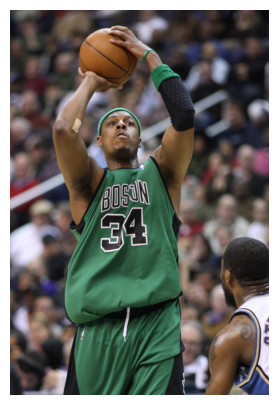

In [118]:
# 顯示訓練數據的一個批次
# print(data.dataloaders)
# 查看訓練集中的第一張圖片
img, label = data.train_ds[0]
img.show()
print("Label:", label)



In [129]:
# data.train_ds[9]

In [131]:
data.c

3

In [139]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('C://Users/gmluo/Documents/Mark/1.Project/30.yolo/working'),\
                    path = Path("."))

In [146]:
# learn.summary()

In [148]:
# print(learn.recorder)

In [160]:
# print(learn.model)

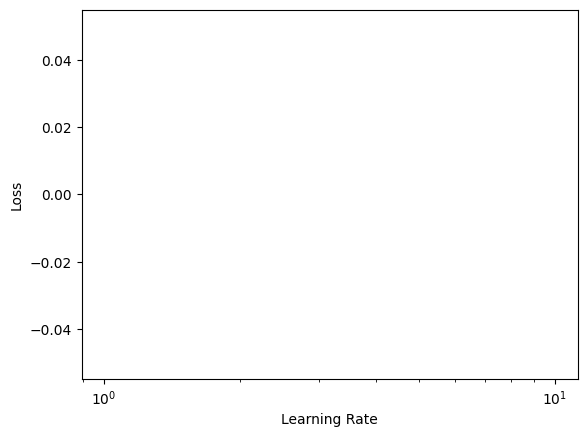

In [154]:
learn.recorder.plot_lr_find()

In [159]:
# learn.recorder.plot_loss()

In [157]:
# learn.recorder.plot_sched()

In [158]:
# learn.lr_find()

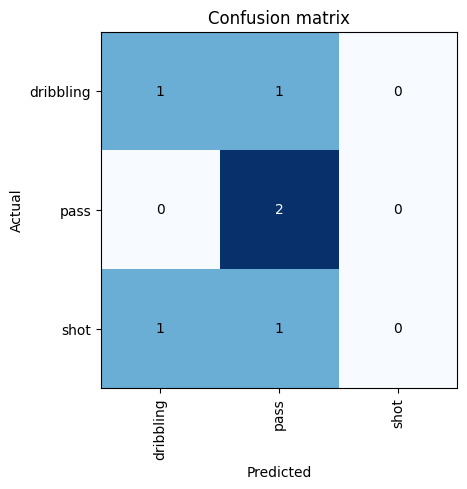

In [149]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

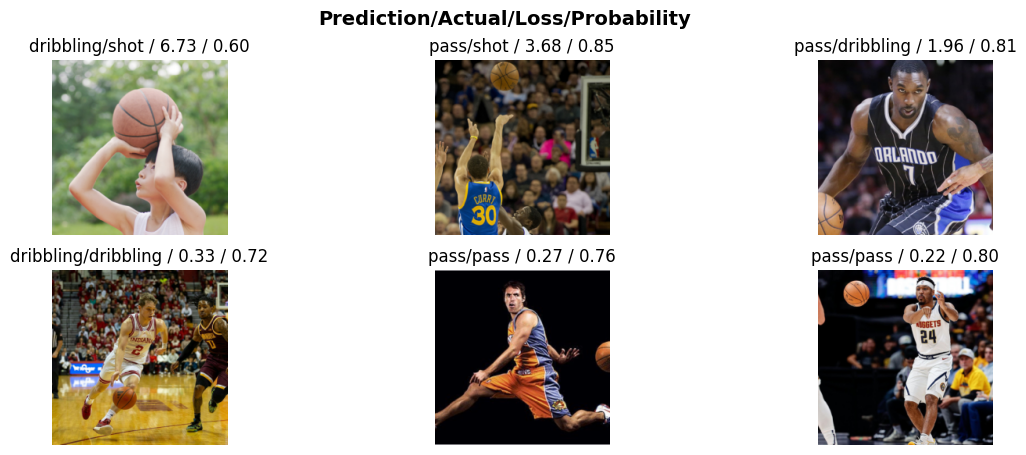

In [185]:
interp.plot_top_losses(6,figsize = (14,5))

In [141]:
# learn

In [172]:
from fastai.vision.all import *
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [181]:
img =  Image.open('C://Users/gmluo/Documents/Mark/1.Project/30.yolo/test/0.jpg')
img = img.resize((img.size[0]//2, img.size[1]//2))
# img

In [182]:
learn.predict(img)
# print()

('pass', tensor(1), tensor([0.3545, 0.6389, 0.0065]))

In [161]:
# learn.lr_find()
# learn.recorder.plot(suggestions=True)

In [162]:
# img, label = data.train_ds[5]
# img.show()
# print("Label:", label)

In [64]:
# # 如果 data.dataloaders 存在，可以直接顯示一個批次的數據
# if data.dataloaders:
#     data.show_batch()


In [65]:
# dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
#                    get_items=get_image_files,
#                    splitter=RandomSplitter(valid_pct=0.2, seed=42),
#                    get_y=parent_label,
#                    item_tfms=Resize(460),
#                    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

# # 創建 DataLoader
# dls = dblock.dataloaders(path)

# # 顯示一個批次的圖像
# dls.show_batch()

In [66]:
# dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
#                    get_items=get_image_files,
#                    splitter=RandomSplitter(valid_pct=0.2, seed=42),
#                    get_y=parent_label,
#                    item_tfms=Resize(460),
#                    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

# dls = dblock.dataloaders(path)
# dls.show_batch()

In [163]:
# data

In [68]:
# data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

In [164]:
# print(data.classes)
# len(data.classes)
# data.c

In [77]:
# learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

In [ ]:
# learn.lr_find()
# learn.recorder.plot(suggestions=True)

In [168]:
# pool_size=2
# Dropout = 0.3
# epochs = 20

In [165]:
# from functools import partial

# DefaultConv2D = partial(keras.layers.Conv2D,
#                         kernel_size=3, activation='relu', padding="SAME")

# model = keras.models.Sequential([
#     DefaultConv2D(filters=64, kernel_size=5, input_shape=[32, 32, 3]),
#     keras.layers.MaxPooling2D(pool_size=pool_size),
#     DefaultConv2D(filters=128),
#     DefaultConv2D(filters=128),
#     keras.layers.MaxPooling2D(pool_size=pool_size),
#     DefaultConv2D(filters=256),
#     DefaultConv2D(filters=256),
#     keras.layers.MaxPooling2D(pool_size=pool_size),
#     keras.layers.Flatten(),
#     keras.layers.Dense(units=128, activation='relu'),
#     keras.layers.Dropout(Dropout),
#     keras.layers.Dense(units=64, activation='relu'),
#     keras.layers.Dropout(Dropout),
#     keras.layers.Dense(units=43, activation='softmax'),
# ])

In [166]:
# model.summary()

In [167]:
# model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))